In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

In [2]:
df = pd.read_csv('df_SF.csv')

In [3]:
df.drop(['DS_PM_stdd','station','date'],axis=1,inplace=True)

In [5]:
#valid is a time stamp and should have the day, month, year, hour separated
df['valid']=pd.to_datetime(df['valid'])
df['year']=df['valid'].dt.year
df['month']=df['valid'].dt.month
df['day']=df['valid'].dt.day
df['hour']=df['valid'].dt.hour
df.drop(['valid'],axis=1,inplace=True)

In [6]:
#create a new col 'loc' in order to make ('lon,'lat') into a categorical variable
df['location']=[x for x in zip(df['lon'],df['lat'])]
df.drop(['lon','lat'],axis=1,inplace=True)

In [7]:
df

,DS_PM_pred,tmpf,relh,drct,sped,year,month,day,hour,location
84917819,4.028,54.0,41.11,350.0,19.55,2019,1,1,0,"(-122.5131, 37.86929)"
84917820,4.028,54.0,42.98,350.0,21.85,2019,1,1,1,"(-122.5131, 37.86929)"
84917821,4.028,53.0,40.96,350.0,28.75,2019,1,1,2,"(-122.5131, 37.86929)"
84917822,4.028,53.0,42.48,360.0,27.60,2019,1,1,3,"(-122.5131, 37.86929)"
84917823,4.028,52.0,46.25,360.0,21.85,2019,1,1,4,"(-122.5131, 37.86929)"
...,...,...,...,...,...,...,...,...,...,...
89082870,2.467,54.0,42.98,350.0,27.60,2018,12,31,19,"(-122.38303, 37.62068)"
89082871,2.467,54.0,42.98,350.0,28.75,2018,12,31,20,"(-122.38303, 37.62068)"
89082872,2.467,55.0,38.21,350.0,26.45,2018,12,31,21,"(-122.38303, 37.62068)"
89082873,2.467,54.0,39.63,360.0,21.85,2018,12,31,22,"(-122.38303, 37.62068)"


In [9]:
df['location'].nunique()

224

In [10]:
#I found the historically high pm2.5 levels explanation
#https://www.sfgate.com/weather/article/Worst-air-quality-in-San-Francisco-Bay-Area-BAAQMD-13511176.php
df.loc[df['DS_PM_pred'].idxmax()]

DS_PM_pred                   176.822
tmpf                            58.0
relh                           64.47
drct                            90.0
sped                            3.45
year                            2018
month                             11
day                               16
hour                               0
location      (-122.40626, 37.75891)
Name: 88805987, dtype: object

"The Camp Fire started on Thursday, November 8, 2018, in Northern California's Butte County. Ignited by a faulty electric transmission line, the fire originated above several communities and an east wind drove the fire downhill through developed areas."

https://www.fire.ca.gov/our-impact/remembering-the-camp-fire

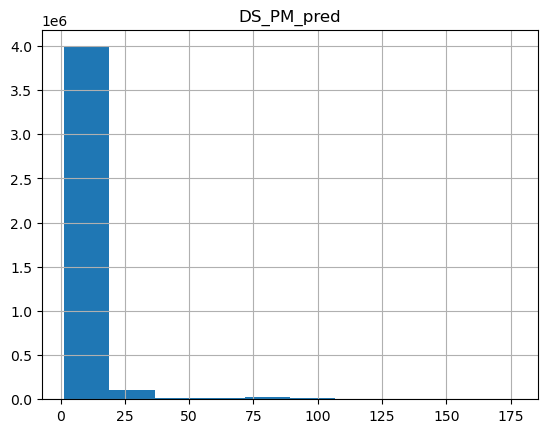

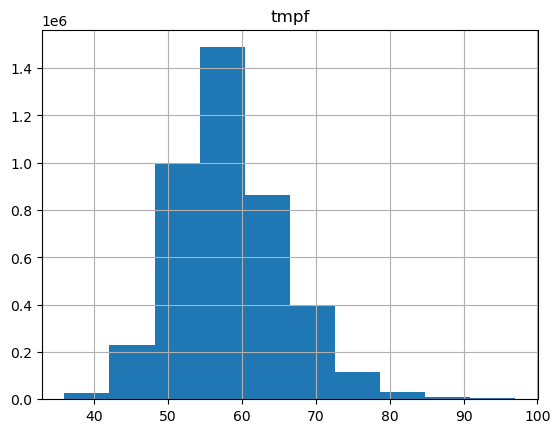

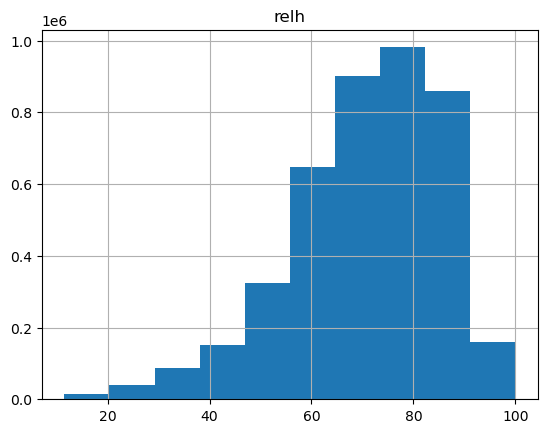

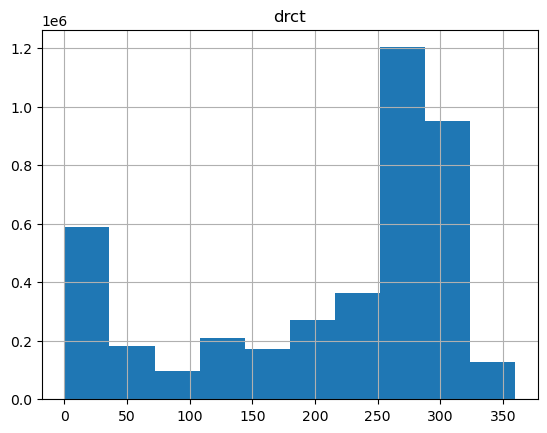

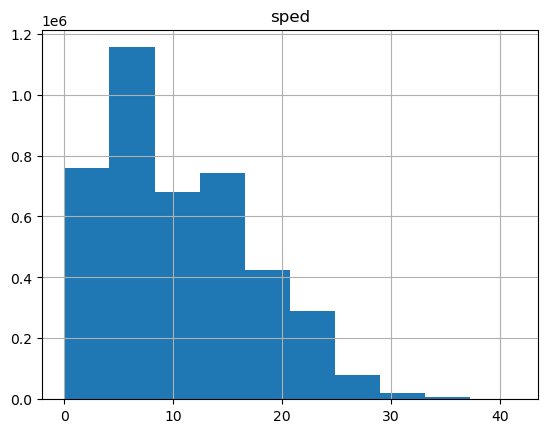

In [11]:
%matplotlib inline
for i in df[['DS_PM_pred', 'tmpf','relh', 'drct', 'sped']]:
    df[i].hist()
    plt.title(i)
    plt.show()

In [ ]:
dfnum = df[['DS_PM_pred', 'tmpf','relh', 'drct', 'sped']]

Questions:

1. I assume all the feature engineering for numerical data may be based on the histograms above, which scales are appropriate for each type?
Notes: 
'tmpf' temperature is nearly normal, should I just use StandardScaler?
'relh' relative humidity is left skewed. 
'drct' wind direction has many '0' values whenever there is no wind direction (0 speed) or measure error. RobustScaler?
'sped' wind speed is right skewed.

2. Should I scale the target value 'DS_PM_pred' after train-test split? It seems like a log transformation because I want to keep the outliers because they are what I want to predict for. However, I don't want information to creep in because it knows to expect outliers if I transform before splitting, correct?

3. How should I deal with the location feature? (224 unique locations) One-hot, dummy, etc.?